In [1]:
#import the files required
from google.colab import files
import io
uploaded =files.upload()
for fn in uploaded.keys():
   print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving train_set.csv to train_set.csv
User uploaded file "train_set.csv" with length 38013 bytes


In [2]:
#import the files required
from google.colab import files
import io
upload =files.upload()
for fn in upload.keys():
   print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(upload[fn])))

Saving test_set.csv to test_set.csv
User uploaded file "test_set.csv" with length 21957 bytes


In [3]:
#Load the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
test_data = pd.read_csv('test_set.csv')
print("Rows, columns: " + str(test_data.shape))

Rows, columns: (367, 12)


In [5]:
Loan_prediction_data = pd.read_csv('train_set.csv')
print("Rows, columns: " + str(Loan_prediction_data.shape))

Rows, columns: (614, 13)


In [6]:
Loan_prediction_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
Loan_prediction_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
Loan_prediction_data.isnull().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

Number of attributes having missing values 7


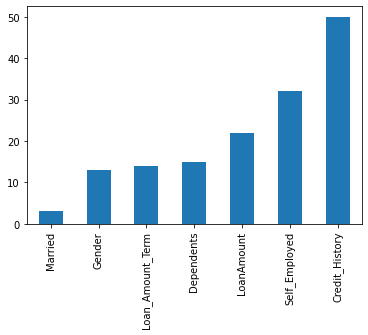

In [9]:
missing = Loan_prediction_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
print("Number of attributes having missing values " + str(len(missing)))

In [10]:
Loan_prediction_data.describe() 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#Data cleaning 

In [11]:
print(Loan_prediction_data['Gender'].value_counts())
Loan_prediction_data['Gender'].fillna('Male', inplace=True)

Male      489
Female    112
Name: Gender, dtype: int64


In [12]:
print(Loan_prediction_data['Married'].value_counts())
Loan_prediction_data['Married'].fillna('Yes', inplace=True)

Yes    398
No     213
Name: Married, dtype: int64


In [13]:
print(Loan_prediction_data['Dependents'].value_counts())
Loan_prediction_data['Dependents'].fillna('0', inplace=True)

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [14]:
print(Loan_prediction_data['Self_Employed'].value_counts())
Loan_prediction_data['Self_Employed'].fillna('NO', inplace=True)

No     500
Yes     82
Name: Self_Employed, dtype: int64


In [15]:
print(Loan_prediction_data['Credit_History'].value_counts())
Loan_prediction_data.Credit_History.fillna(1.0, inplace=True)

1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [16]:
Loan_prediction_data.isnull().sum().sort_values(ascending = False)

LoanAmount           22
Loan_Amount_Term     14
Loan_Status           0
Property_Area         0
Credit_History        0
CoapplicantIncome     0
ApplicantIncome       0
Self_Employed         0
Education             0
Dependents            0
Married               0
Gender                0
Loan_ID               0
dtype: int64

In [17]:
print(Loan_prediction_data['Loan_Amount_Term'].value_counts())

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [18]:
print("Median of 'Loan_Amount_Term':",Loan_prediction_data['Loan_Amount_Term'].median())
print("Mode of 'Loan_Amount_Term':",Loan_prediction_data['Loan_Amount_Term'].mode())

Median of 'Loan_Amount_Term': 360.0
Mode of 'Loan_Amount_Term': 0    360.0
dtype: float64


In [19]:
Loan_prediction_data['Loan_Amount_Term'].fillna('360.0', inplace=True)

The most occurring value is 360 which is nothing but 30 years.There is no difference between median and mode values.Here it replaced with value (360.0). 

In [20]:
Loan_prediction_data["LoanAmount"] = Loan_prediction_data["LoanAmount"].replace(np.nan,Loan_prediction_data["LoanAmount"].mean()) 

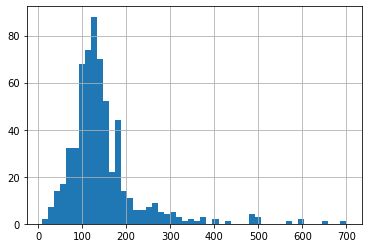

In [21]:
Loan_prediction_data['LoanAmount'].hist(bins=50)
plt.show()

 Loan_ID should be unique. So if there n number of rows, there should be n number of unique Loan_ID’s. Let us check for that. If there are any duplicate values we can remove that.

In [22]:
Loan_prediction_data.apply(lambda x: len(x.unique()))

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          3
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

#Exploratory data analysis

1) Univariate Analysis

numercial data - box plot and histogram 

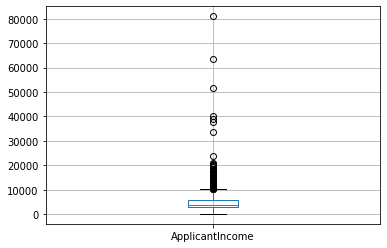

In [23]:
Loan_prediction_data.boxplot(column='ApplicantIncome')
plt.show()

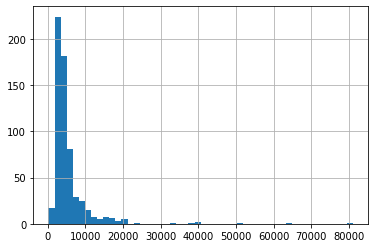

In [24]:
Loan_prediction_data['ApplicantIncome'].hist(bins=50)
plt.show()

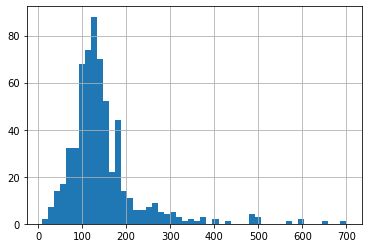

In [25]:
Loan_prediction_data['LoanAmount'].hist(bins=50)
plt.show()

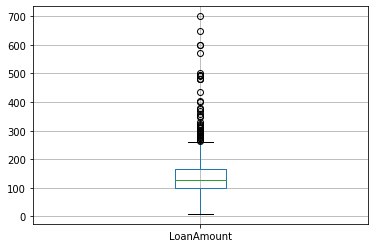

In [26]:
Loan_prediction_data.boxplot(column='LoanAmount')
plt.show()

there are outliers in both the columns.

2) bivarient analysis

categorical data - count plot

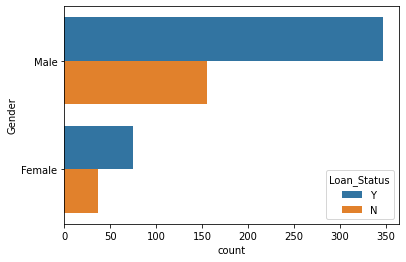

In [27]:
sns.countplot(y ='Gender' , hue = 'Loan_Status', data = Loan_prediction_data)
plt.show()

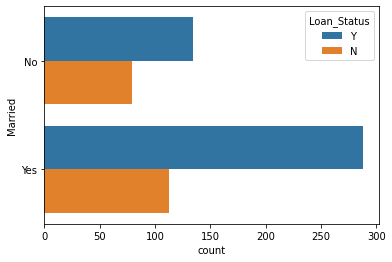

In [28]:
sns.countplot(y ='Married' , hue = 'Loan_Status', data = Loan_prediction_data)
plt.show()

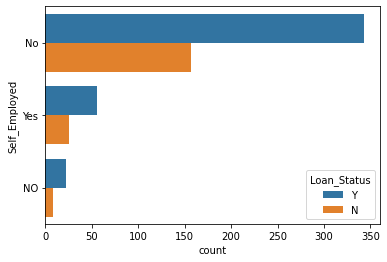

In [29]:
sns.countplot(y ='Self_Employed' , hue = 'Loan_Status', data = Loan_prediction_data)
plt.show()

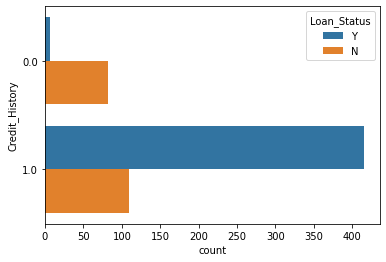

In [30]:
sns.countplot(y ='Credit_History' , hue = 'Loan_Status', data = Loan_prediction_data)
plt.show()

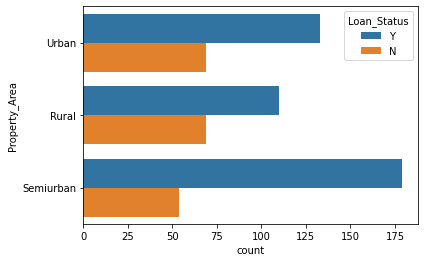

In [31]:
sns.countplot(y ='Property_Area' , hue = 'Loan_Status', data = Loan_prediction_data)
plt.show()

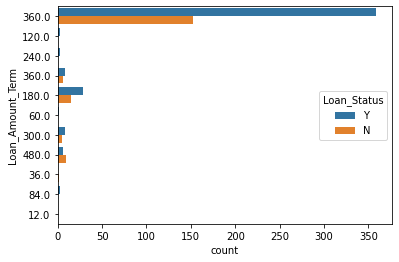

In [32]:
sns.countplot(y ='Loan_Amount_Term' , hue = 'Loan_Status', data = Loan_prediction_data)
plt.show()

1) More males tend to take loan than females.

2) Married people are more on loan than unmarried people.

3) Self-employed people take less loans than those are not self-employed.

4) credit history shows that high number of people pay back their loans.

5) Semiurban obtain more loan, folowed by Urban and then rural. This is logical!

6) Most of the people opt for 360 cyclic loan term which is pay back within a year of time.

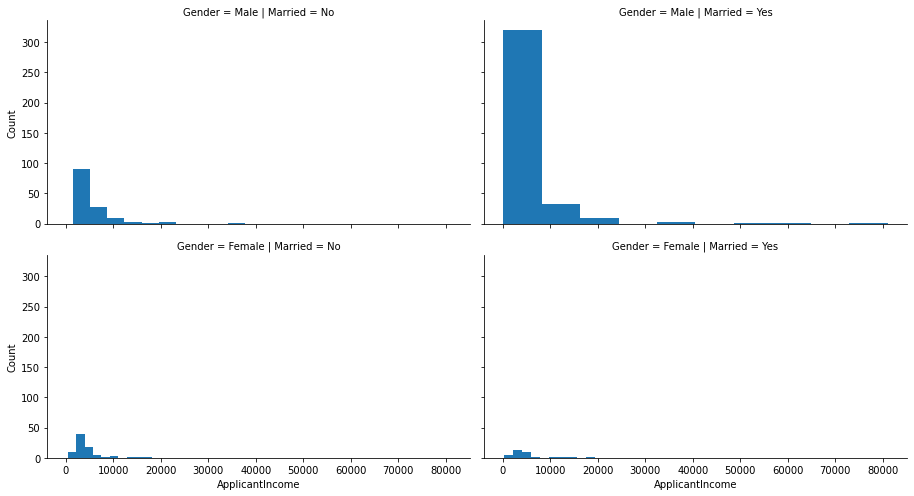

In [33]:
grid = sns.FacetGrid(Loan_prediction_data, row = 'Gender', col = 'Married', height = 3.5, aspect=1.8)
grid.map_dataframe(plt.hist, 'ApplicantIncome')
grid.set_axis_labels('ApplicantIncome', 'Count')
plt.show()

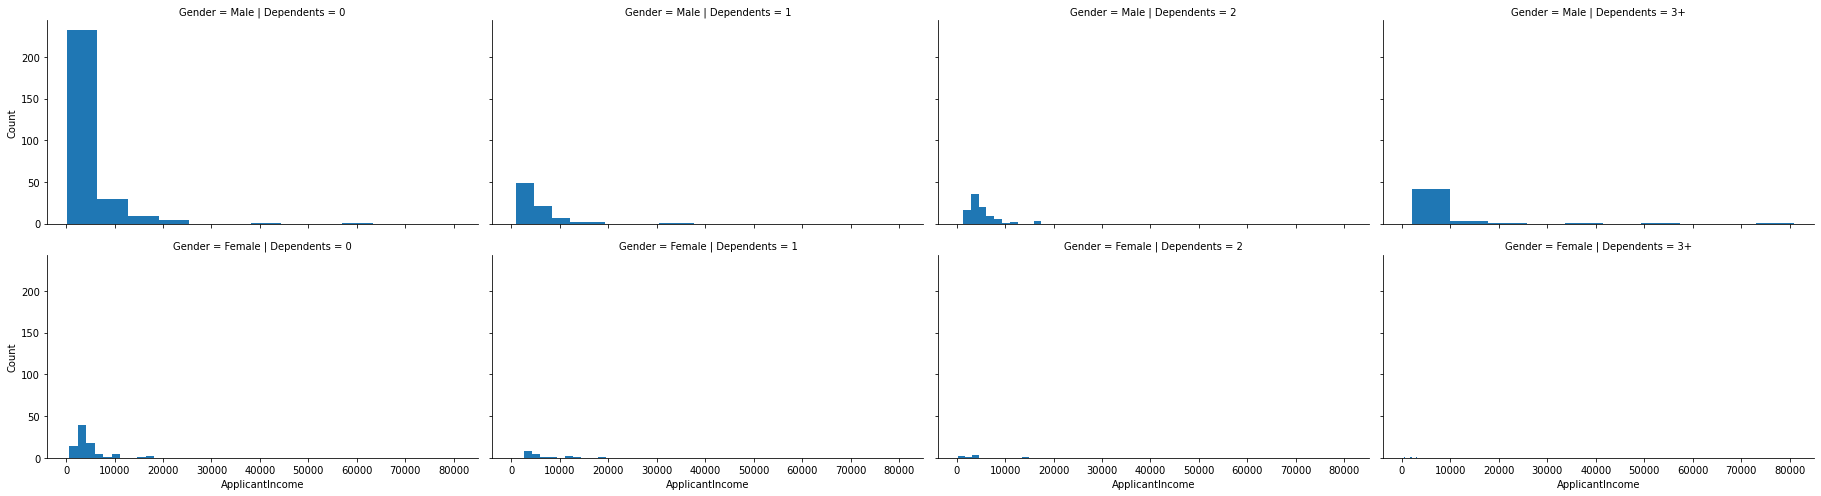

In [34]:
grid = sns.FacetGrid(Loan_prediction_data, row = 'Gender', col = 'Dependents', height = 3.5, aspect=1.8)
grid.map_dataframe(plt.hist, 'ApplicantIncome')
grid.set_axis_labels('ApplicantIncome', 'Count')
plt.show()

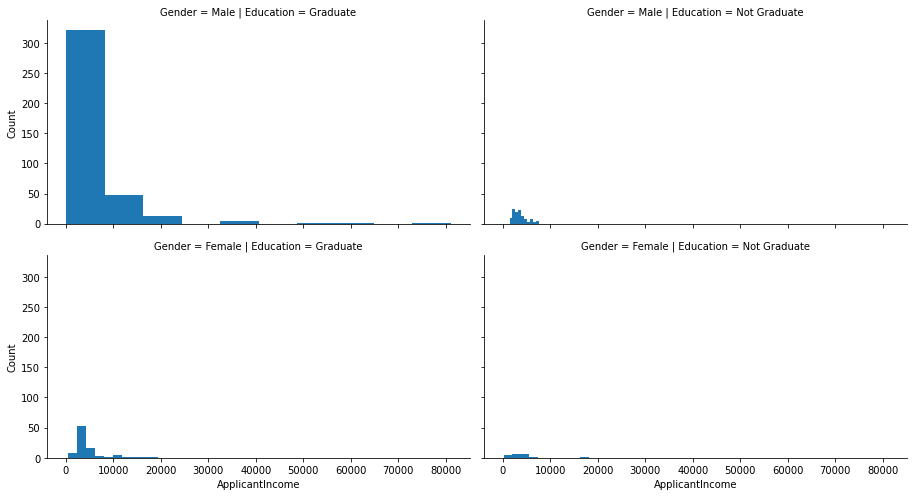

In [35]:
grid = sns.FacetGrid(Loan_prediction_data, row = 'Gender', col = 'Education', height = 3.5, aspect=1.8)
grid.map_dataframe(plt.hist, 'ApplicantIncome')
grid.set_axis_labels('ApplicantIncome', 'Count')
plt.show()

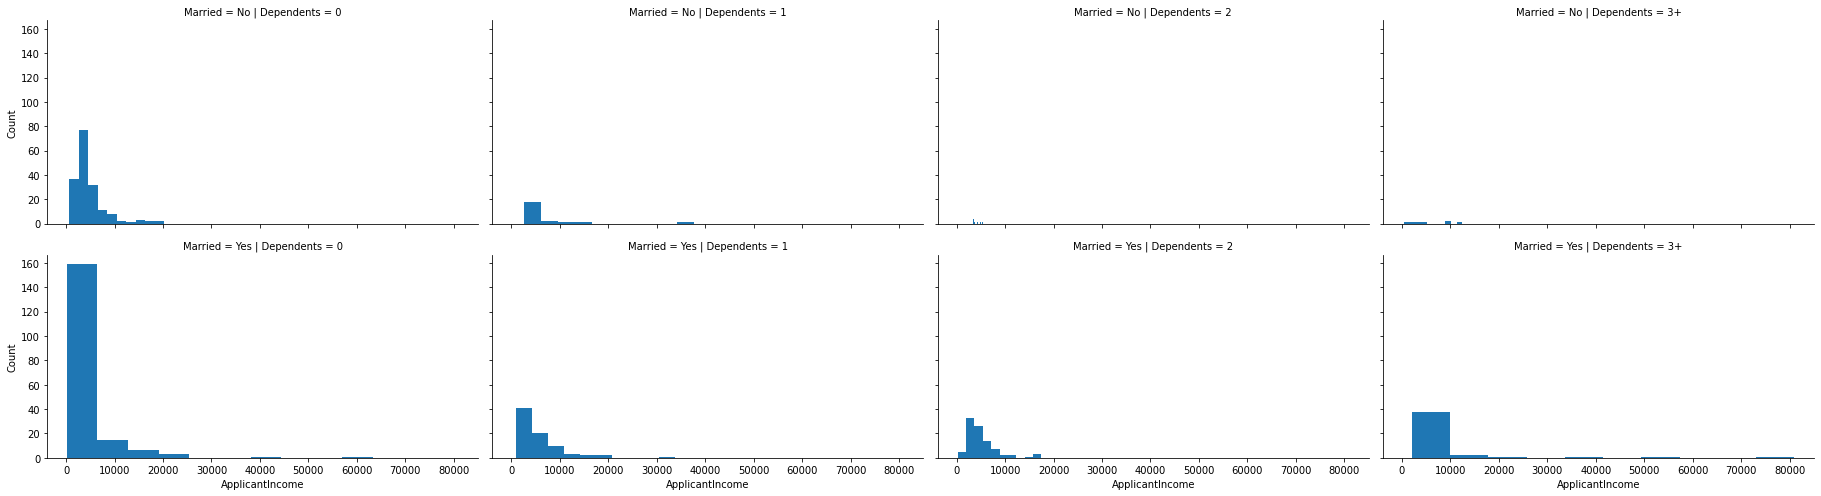

In [36]:
grid = sns.FacetGrid(Loan_prediction_data, row = 'Married', col = 'Dependents', height = 3.5, aspect=1.8)
grid.map_dataframe(plt.hist, 'ApplicantIncome')
grid.set_axis_labels('ApplicantIncome', 'Count')
plt.show()

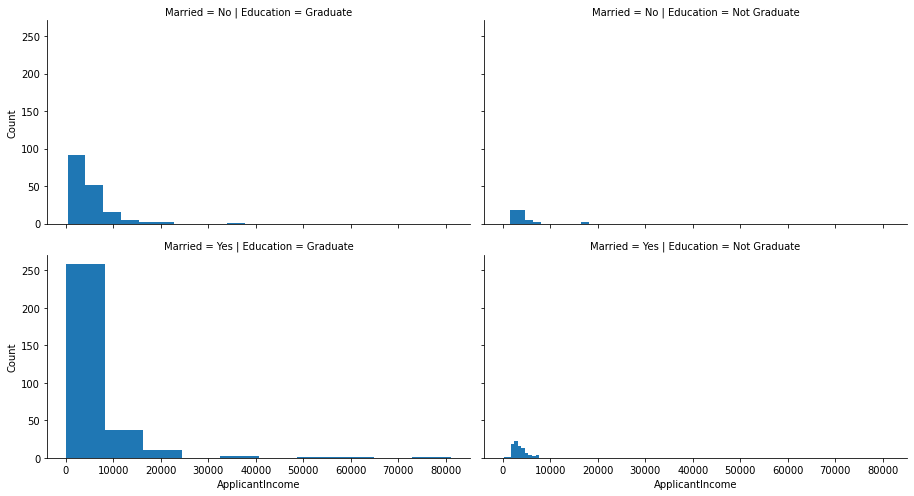

In [37]:
grid = sns.FacetGrid(Loan_prediction_data, row = 'Married', col = 'Education', height = 3.5, aspect=1.8)
grid.map_dataframe(plt.hist, 'ApplicantIncome')
grid.set_axis_labels('ApplicantIncome', 'Count')
plt.show()

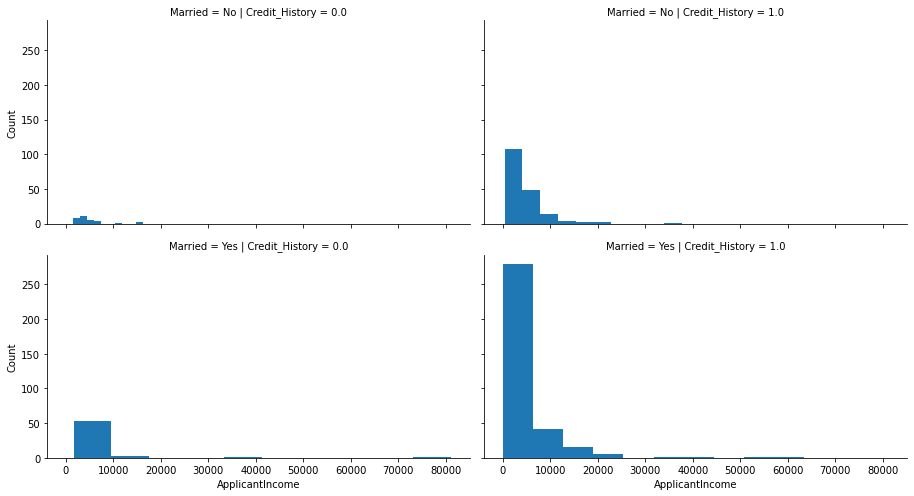

In [38]:
grid = sns.FacetGrid(Loan_prediction_data, row = 'Married', col = 'Credit_History', height = 3.5, aspect=1.8)
grid.map_dataframe(plt.hist, 'ApplicantIncome')
grid.set_axis_labels('ApplicantIncome', 'Count')
plt.show()

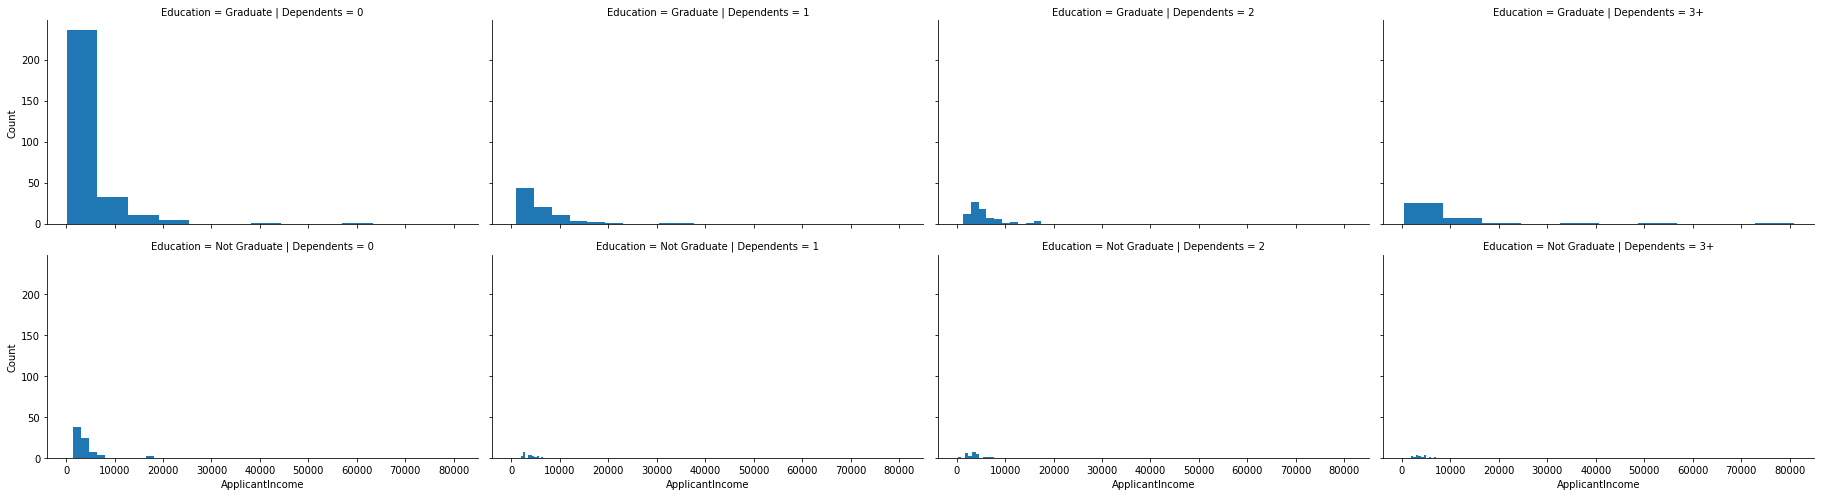

In [39]:
grid = sns.FacetGrid(Loan_prediction_data, row = 'Education', col = 'Dependents', height = 3.5, aspect=1.8)
grid.map_dataframe(plt.hist, 'ApplicantIncome')
grid.set_axis_labels('ApplicantIncome', 'Count')
plt.show()

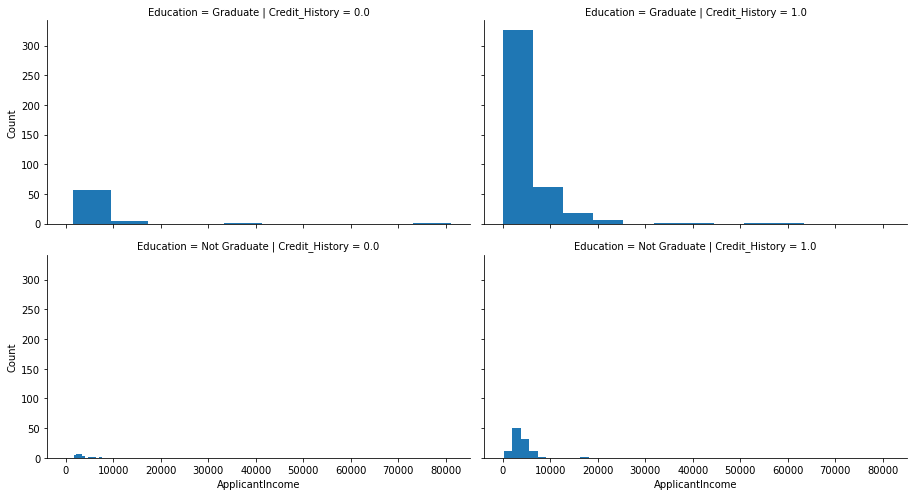

In [40]:
grid = sns.FacetGrid(Loan_prediction_data, row = 'Education', col = 'Credit_History', height = 3.5, aspect=1.8)
grid.map_dataframe(plt.hist, 'ApplicantIncome')
grid.set_axis_labels('ApplicantIncome', 'Count')
plt.show()

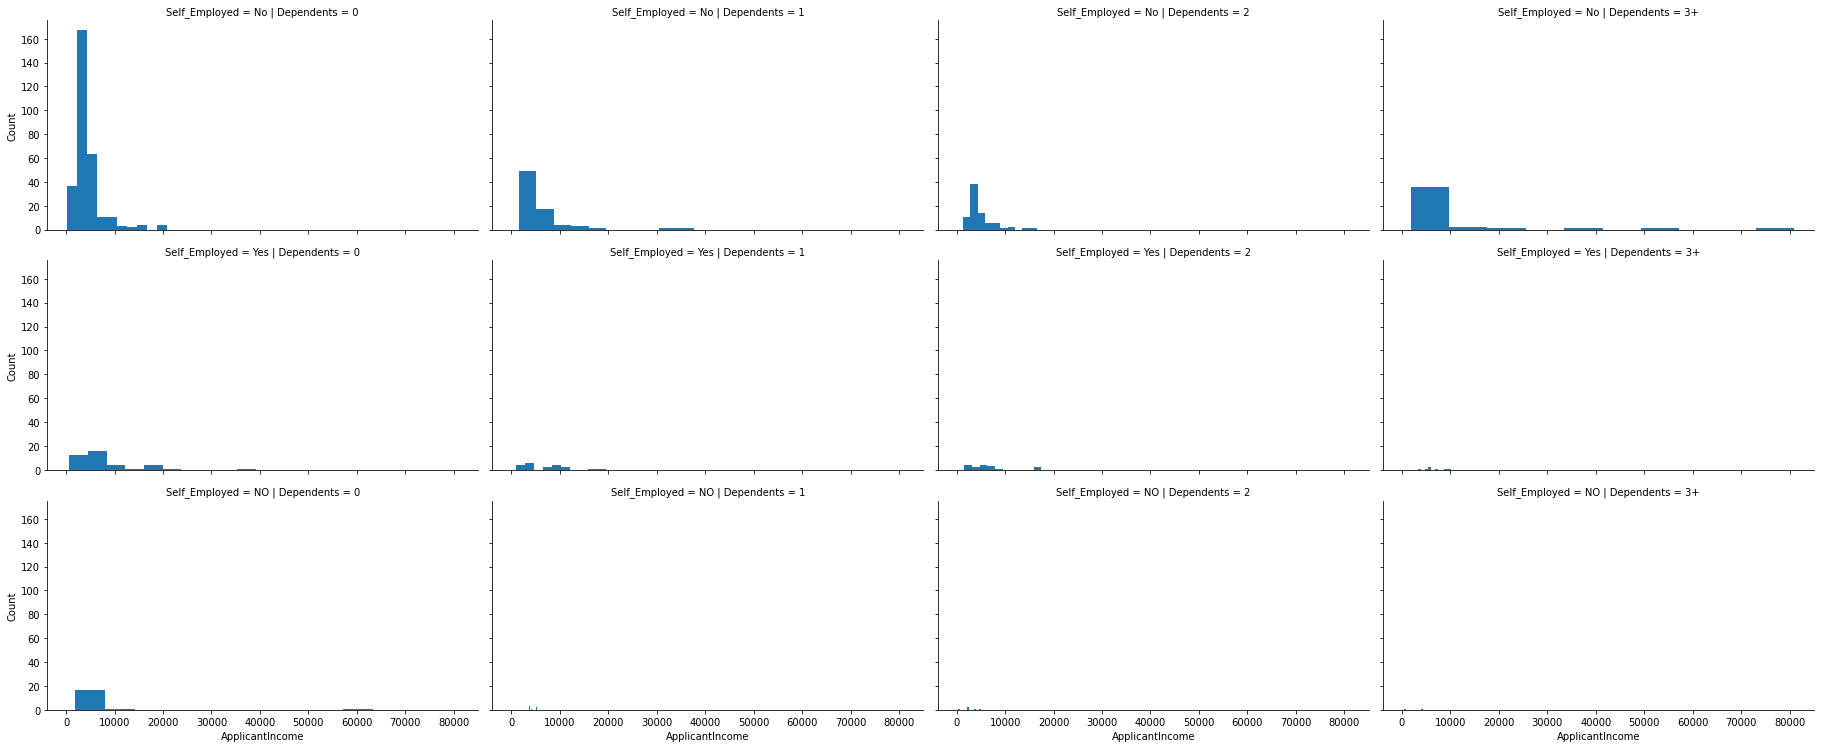

In [41]:
grid = sns.FacetGrid(Loan_prediction_data, row = 'Self_Employed', col = 'Dependents', height = 3.5, aspect=1.8)
grid.map_dataframe(plt.hist, 'ApplicantIncome')
grid.set_axis_labels('ApplicantIncome', 'Count')
plt.show()

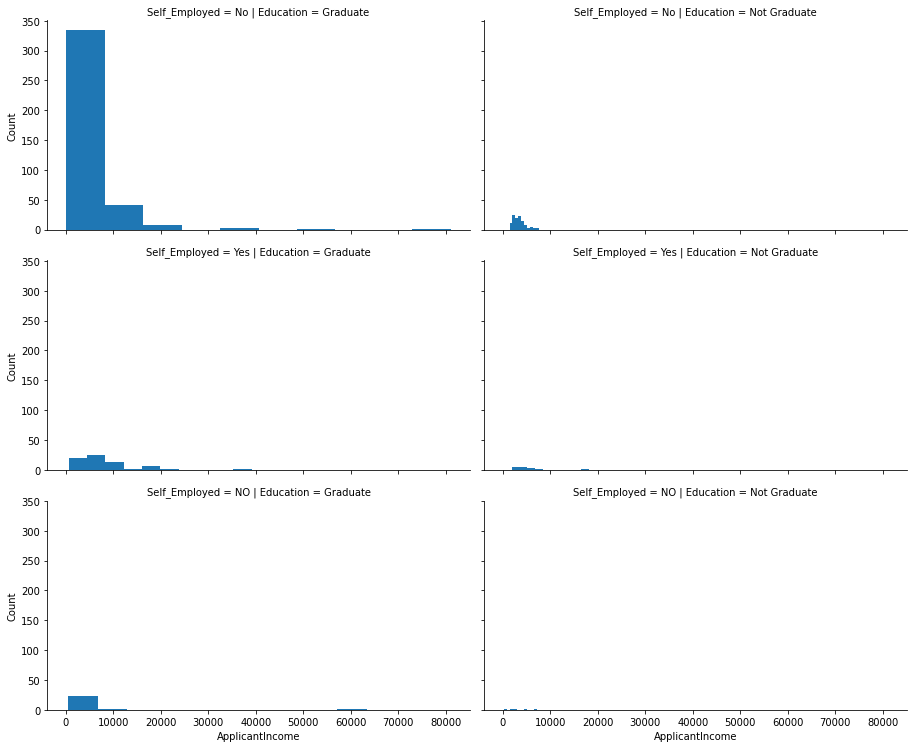

In [42]:
grid = sns.FacetGrid(Loan_prediction_data, row = 'Self_Employed', col = 'Education', height = 3.5, aspect=1.8)
grid.map_dataframe(plt.hist, 'ApplicantIncome')
grid.set_axis_labels('ApplicantIncome', 'Count')
plt.show()

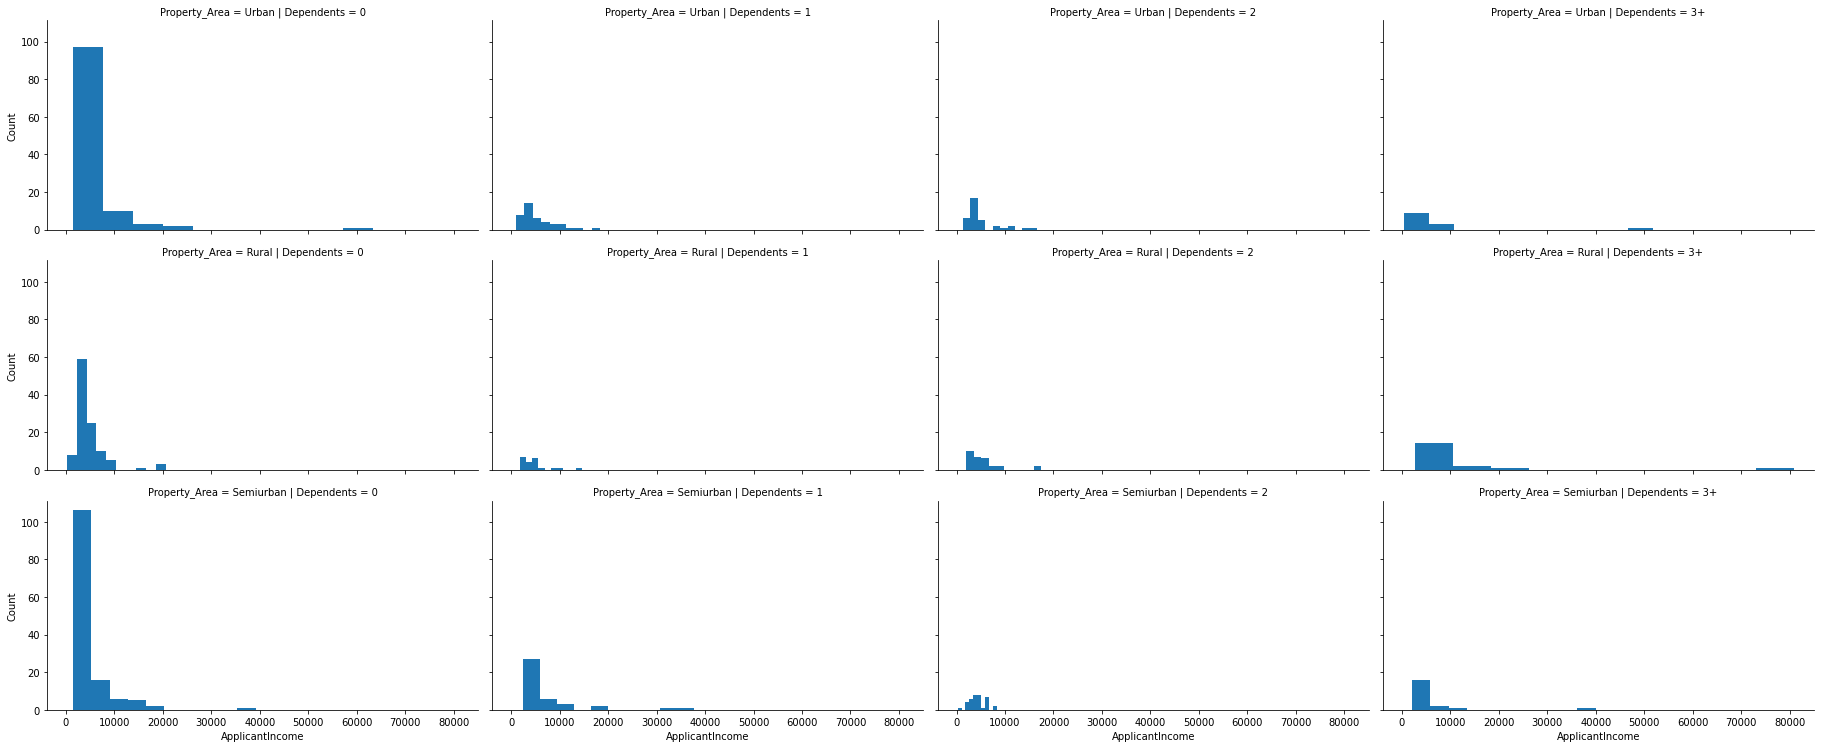

In [43]:
grid = sns.FacetGrid(Loan_prediction_data, row = 'Property_Area', col = 'Dependents', height = 3.5, aspect=1.8)
grid.map_dataframe(plt.hist, 'ApplicantIncome')
grid.set_axis_labels('ApplicantIncome', 'Count')
plt.show()

1. Males generally have the highest income. Explicitly, Males that are married have greater income that unmarried male.
2. No one is dependent and a male tremendously has more income. 
3. A graduate who is a male has more income.
4. Not married and no one is dependent on such has more income. Also, Married and no one dependent has greater income with a decreasing effect as the dependents increases.
5. A graduate and married individual has more income.
6. Married and has a good credit history depicts more income. Also, Not married but has a good credit history follows in the hierarchy.
7. A graduate with no one dependent has more income.
8. Educated with good credit history depicts a good income. Also, not a graduate and have a good credit history can be traced to having a better income than a fellow with no degree
9. No one is dependent and self-employed has more income
10. A graduate but not self-employed has more income.
11. No one is dependent and have property in urban, rural and semiurban has more income.

Correlation matrix plot

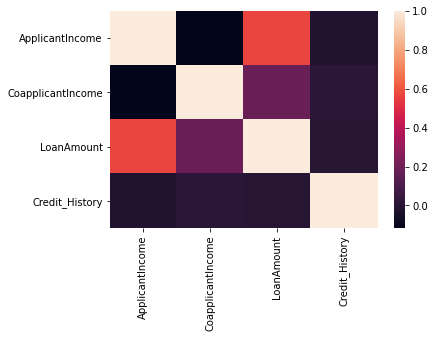

In [44]:
sns.heatmap(Loan_prediction_data.corr())
plt.show()

#Machine learning

In [45]:
#drop all the object types features
Loan_prediction_data = Loan_prediction_data.drop(['Loan_ID'], axis=1)

In [46]:
Loan_prediction_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [47]:
 from sklearn.preprocessing import LabelEncoder
 var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
 le = LabelEncoder()
 for i in var_mod:
     Loan_prediction_data[i] = le.fit_transform(Loan_prediction_data[i])
 Loan_prediction_data.dtypes 

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [48]:
# Splitting traing data
X = Loan_prediction_data.drop('Loan_Status', axis=1)
y = Loan_prediction_data.Loan_Status

In [49]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,1,5849,0.0,146.412162,360,1.0,2
1,1,1,1,0,1,4583,1508.0,128.000000,360,1.0,0
2,1,1,0,0,2,3000,0.0,66.000000,360,1.0,2
3,1,1,0,1,1,2583,2358.0,120.000000,360,1.0,2
4,1,0,0,0,1,6000,0.0,141.000000,360,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,1,2900,0.0,71.000000,360,1.0,0
610,1,1,3,0,1,4106,0.0,40.000000,180,1.0,0
611,1,1,1,0,1,8072,240.0,253.000000,360,1.0,2
612,1,1,2,0,1,7583,0.0,187.000000,360,1.0,2


In [50]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [51]:
test_data.isnull().sum().sort_values(ascending = False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Married               0
Loan_ID               0
dtype: int64

In [52]:
print(test_data['Gender'].value_counts())
test_data['Gender'].fillna('Male', inplace=True)

Male      286
Female     70
Name: Gender, dtype: int64


In [53]:
print(test_data['Dependents'].value_counts())
test_data['Dependents'].fillna('0', inplace=True)

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64


In [54]:
print(test_data['Self_Employed'].value_counts())
test_data['Self_Employed'].fillna('NO', inplace=True)

No     307
Yes     37
Name: Self_Employed, dtype: int64


In [55]:
print(test_data['Credit_History'].value_counts())
test_data.Credit_History.fillna(1.0, inplace=True)

1.0    279
0.0     59
Name: Credit_History, dtype: int64


In [56]:
print(test_data['Loan_Amount_Term'].value_counts())

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64


In [57]:
print("Median of 'Loan_Amount_Term':",test_data['Loan_Amount_Term'].median())
print("Mode of 'Loan_Amount_Term':",test_data['Loan_Amount_Term'].mode())

Median of 'Loan_Amount_Term': 360.0
Mode of 'Loan_Amount_Term': 0    360.0
dtype: float64


In [58]:
test_data['Loan_Amount_Term'].fillna('360.0', inplace=True)

In [59]:
test_data["LoanAmount"] = test_data["LoanAmount"].replace(np.nan,test_data["LoanAmount"].mean()) 

In [60]:
test = test_data.drop(['Loan_ID'], axis=1)

In [61]:
 var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
 le = LabelEncoder()
 for i in var_mod:
     test[i] = le.fit_transform(test[i])
 test.dtypes  

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History       float64
Property_Area          int64
dtype: object

In [62]:
 # Splitting the dataset into the Training set and Test set
 from sklearn.model_selection import train_test_split
 X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [63]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)

In [64]:
# Fitting LogisticRegression to the Training set
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(random_state = 0)
LR_classifier.fit(X_train, y_train)
y_pred = LR_classifier.predict(X_val)

# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(y_pred, y_val))

The accuracy of Logistic Regression is:  0.824390243902439


In [65]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)

# Measuring Accuracy
from sklearn import metrics
print('The accuracy of KNN is: ', metrics.accuracy_score(y_pred, y_val))

The accuracy of KNN is:  0.7951219512195122


In [66]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)

# Measuring Accuracy
from sklearn import metrics
print('The accuracy of SVM is: ', metrics.accuracy_score(y_pred, y_val))

The accuracy of SVM is:  0.8195121951219512


In [67]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)

# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Decision Tree Classifier is: ', metrics.accuracy_score(y_pred, y_val))

The accuracy of Decision Tree Classifier is:  0.7219512195121951


In [68]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)

# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Random Forest Classification is: ', metrics.accuracy_score(y_pred, y_val))

The accuracy of Random Forest Classification is:  0.7853658536585366


Training dataset results:

The accuracy of Logistic Regression is: 82.43 %

The accuracy of KNN is: 79.51 %

The accuracy of SVM is: 81.95 %

The accuracy of Decision Tree Classifier is: 72.19 %

The accuracy of Random Forest Classification is: 78.53 %

#Testing 

In [69]:
# predict on new set with logistic regression
prediction = LR_classifier.predict(test)

test_data['Loan_Status_Prediction'] = prediction 
test_data['Loan_Status_Prediction'] = test_data['Loan_Status_Prediction'].map({1: 'Yes', 0: 'No'})
test_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Prediction
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360,1.0,Urban,Yes
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360,1.0,Urban,No
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360,1.0,Urban,No
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360,1.0,Urban,No
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360,1.0,Urban,Yes
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360,1.0,Urban,No
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360,1.0,Semiurban,Yes
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360,0.0,Rural,Yes
8,LP001059,Male,Yes,2,Graduate,NO,13633,0,280.0,240,1.0,Urban,Yes
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360,1.0,Semiurban,No
